In [1]:
import pandas as pd
from functools import reduce
from collections import defaultdict, Counter

def counter_to_df_row(counter, index):
    if bool(counter):
        row = pd.DataFrame.from_dict(counter, orient='index').transpose()
        row.index = [index]
        return row
    else:
        return pd.DataFrame(index=[index])

def get_tags_from(fname):
    with open(fname) as f:
        fnum = int(fname.split('/')[-1].split('.')[0])
        tags = f.read().splitlines()
        categories = Counter([tag.split(':')[0] for tag in tags])
        subcategories = Counter([tag.split(':')[1] for tag in tags])
        
        cat_row = counter_to_df_row(categories, fnum)
        subcat_row = counter_to_df_row(subcategories, fnum)
        
    return cat_row, subcat_row


files = ['./data/tags_train/{}.txt'.format(i) for i in range(10000)]
all_tags = [get_tags_from(file) for file in files]
cats, subcats = tuple(zip(*all_tags))

cats = reduce(lambda x, y: x.append(y), cats)
cats.fillna(0, inplace=True)
cats = cats.sort_index()

subcats = reduce(lambda x, y: x.append(y), subcats)
subcats.fillna(0, inplace=True)
subcats = subcats.sort_index()

In [3]:
files = ['./data/tags_test/{}.txt'.format(i) for i in range(2000)]
all_tags = [get_tags_from(file) for file in files]
cats_test, subcats_test = tuple(zip(*all_tags))

cats_test = reduce(lambda x, y: x.append(y), cats_test)
cats_test.fillna(0, inplace=True)
cats_test = cats_test.sort_index()

subcats_test = reduce(lambda x, y: x.append(y), subcats_test)
subcats_test.fillna(0, inplace=True)
subcats_test = subcats_test.sort_index()

In [19]:
tags = pd.concat([cats, subcats], axis=1)
tags_test = pd.concat([cats_test, subcats_test], axis=1)

In [26]:
test_tag_matrix = np.zeros((2000,92))

files = ['./data/descriptions_test/'+str(i)+'.txt' for i in range(2000)]
for fname in files:
    fnum = int(fname.split('/')[-1].split('.')[0])
    with open(fname,'r') as f:
        text = f.read()
        test_tag_matrix[fnum,:] = np.array([tag in text for tag in tags.columns]).astype(int)

test_desc_tags = pd.DataFrame(test_tag_matrix, columns=tags.columns)

In [208]:
results = dict()

for group, values in test_desc_tags.dot(tags_test.T).iterrows():
    top_20 = [str(num) for num in list(values.nlargest(20).index)]
    results[str(group)+'.txt'] = '.jpg '.join(top_20) + '.jpg'

results = pd.DataFrame.from_dict(results, orient='index').reset_index()
results.columns = ['Descritpion_ID','Top_20_Image_IDs']
results.to_csv('new_submission.csv', index=False,index_label=False)

In [201]:
!cat ./data/descriptions_test/2.txt

A group of traffic lights sitting above an intersection.
The sign shining down over the street lights
A picture of a stoplight from a window.
The sun surrounded by an airplane and traffic lights 
Several street lights and an airplane flying overhead.


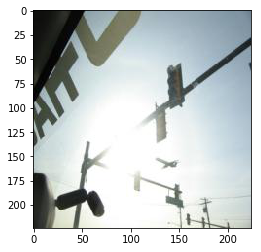

In [205]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img=mpimg.imread('./data/images_test/598.jpg')
imgplot=plt.imshow(img)

In [202]:
list(test_desc_tags.iloc[2][test_desc_tags.iloc[2] != 0].index)

['airplane', 'traffic light']

In [204]:
list(tags_test.iloc[598][tags_test.iloc[598] !=0 ].index)

['outdoor', 'vehicle', 'airplane', 'traffic light']

In [146]:
test_desc_tags.values[1,:].dot(tags_test.values[1070,:].T)

0.0

In [142]:
tags_test.values[107,:]

array([ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [162]:
x = (test_desc_tags.dot(tags_test.T).values*-1).argsort()
np.where(x[1,:] == 0)[0][0]

1070

In [184]:
x = test_desc_tags.dot(tags_test.T).values.argsort()
np.where(x == 1999)

(array([   0,    1,    2, ..., 1997, 1998, 1999]),
 array([1713, 1897, 1865, ...,  609, 1943, 1888]))

In [190]:
tags.columns

Index(['accessory', 'animal', 'appliance', 'electronic', 'food', 'furniture',
       'indoor', 'kitchen', 'outdoor', 'person', 'sports', 'vehicle',
       'airplane', 'apple', 'backpack', 'banana', 'baseball bat',
       'baseball glove', 'bear', 'bed', 'bench', 'bicycle', 'bird', 'boat',
       'book', 'bottle', 'bowl', 'broccoli', 'bus', 'cake', 'car', 'carrot',
       'cat', 'cell phone', 'chair', 'clock', 'couch', 'cow', 'cup',
       'dining table', 'dog', 'donut', 'elephant', 'fire hydrant', 'fork',
       'frisbee', 'giraffe', 'hair drier', 'handbag', 'horse', 'hot dog',
       'keyboard', 'kite', 'knife', 'laptop', 'microwave', 'motorcycle',
       'mouse', 'orange', 'oven', 'parking meter', 'person', 'pizza',
       'potted plant', 'refrigerator', 'remote', 'sandwich', 'scissors',
       'sheep', 'sink', 'skateboard', 'skis', 'snowboard', 'spoon',
       'sports ball', 'stop sign', 'suitcase', 'surfboard', 'teddy bear',
       'tennis racket', 'tie', 'toaster', 'toilet', 'toot